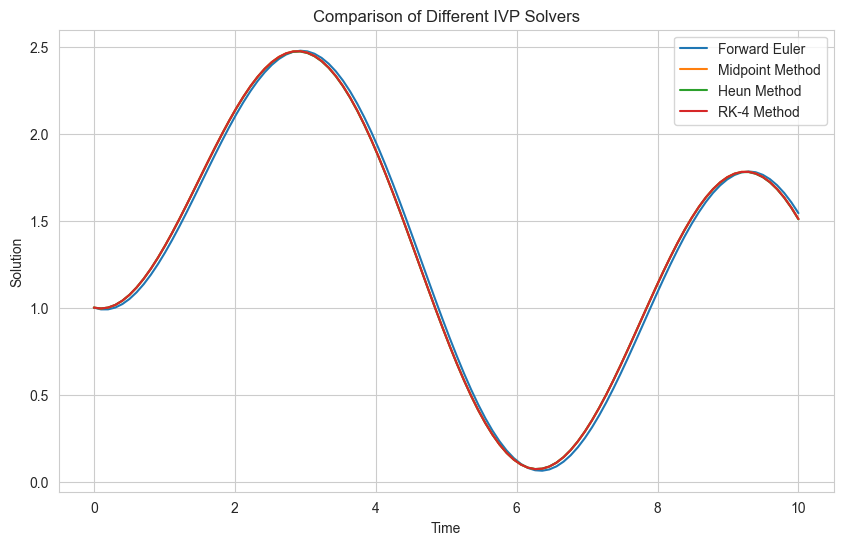

In [1]:
import numpy as np

def forward_euler(f, y0, t):
    """
    Forward Euler method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dy/dt = f(t, y)
        y0: initial value of y at t0
        t: array of time points where the solution is computed
        
    Returns:
        y: array containing the solution
    """
    y = np.zeros(len(t))
    y[0] = y0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1])
    return y

def midpoint_method(f, y0, t):
    """
    Midpoint method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dy/dt = f(t, y)
        y0: initial value of y at t0
        t: array of time points where the solution is computed
        
    Returns:
        y: array containing the solution
    """
    y = np.zeros(len(t))
    y[0] = y0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        y_half = y[i-1] + 0.5 * dt * f(t[i-1], y[i-1])
        y[i] = y[i-1] + dt * f(t[i-1] + 0.5 * dt, y_half)
    return y

def heun_method(f, y0, t):
    """
    Heun's method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dy/dt = f(t, y)
        y0: initial value of y at t0
        t: array of time points where the solution is computed
        
    Returns:
        y: array containing the solution
    """
    y = np.zeros(len(t))
    y[0] = y0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + dt, y[i-1] + dt * k1)
        y[i] = y[i-1] + 0.5 * dt * (k1 + k2)
    return y

def rk4_method(f, y0, t):
    """
    Fourth-order Runge-Kutta method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dy/dt = f(t, y)
        y0: initial value of y at t0
        t: array of time points where the solution is computed
        
    Returns:
        y: array containing the solution
    """
    y = np.zeros(len(t))
    y[0] = y0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2)
        k4 = f(t[i-1] + dt, y[i-1] + dt*k3)
        y[i] = y[i-1] + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Example usage:

# Define your differential equation dy/dt = f(t, y)
def f(t, y):
    return -0.1 * y + np.sin(t)

# Define initial conditions
y0 = 1.0
t = np.linspace(0, 10, 100)

# Solve using different methods
forward_euler_solution = forward_euler(f, y0, t)
midpoint_solution = midpoint_method(f, y0, t)
heun_solution = heun_method(f, y0, t)
rk4_solution = rk4_method(f, y0, t)

# Plotting the solutions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, forward_euler_solution, label='Forward Euler')
plt.plot(t, midpoint_solution, label='Midpoint Method')
plt.plot(t, heun_solution, label='Heun Method')
plt.plot(t, rk4_solution, label='RK-4 Method')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Comparison of Different IVP Solvers')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/9l/wzktnb7d54j9v29n0t_pr3nw0000gn/T/ipykernel_30336/2699994974.py:13: RuntimeWarning: overflow encountered in scalar multiply
  return r * P * (1 - P / K)


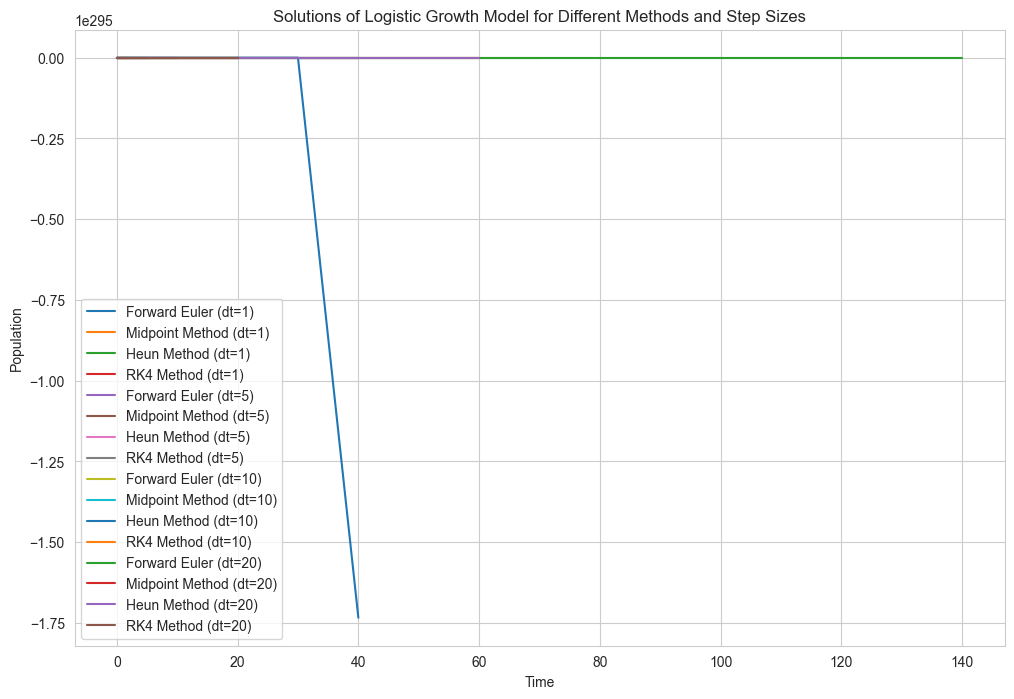

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
r = 5
K = 80
P0 = 90
t0 = 0
t_end = 200

# Function for the differential equation
def dP_dt(P):
    return r * P * (1 - P / K)

# Forward Euler Method
def forward_euler(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        P[i + 1] = P[i] + dt * dP_dt(P[i])
    return P

# Midpoint Method
def midpoint(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + 0.5 * dt * k1)
        P[i + 1] = P[i] + dt * k2
    return P

# Heun Method
def heun(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + dt * k1)
        P[i + 1] = P[i] + 0.5 * dt * (k1 + k2)
    return P

# Runge-Kutta Method (RK4)
def rk4(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + 0.5 * dt * k1)
        k3 = dP_dt(P[i] + 0.5 * dt * k2)
        k4 = dP_dt(P[i] + dt * k3)
        P[i + 1] = P[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return P

# Step sizes to test
step_sizes = [1, 5, 10, 20]

# Plotting
plt.figure(figsize=(12, 8))

for dt in step_sizes:
    time_steps = np.arange(t0, t_end + dt, dt)
    
    # Forward Euler
    P_forward_euler = forward_euler(dt)
    plt.plot(time_steps, P_forward_euler, label=f'Forward Euler (dt={dt})')
    
    # Midpoint Method
    P_midpoint = midpoint(dt)
    plt.plot(time_steps, P_midpoint, label=f'Midpoint Method (dt={dt})')
    
    # Heun Method
    P_heun = heun(dt)
    plt.plot(time_steps, P_heun, label=f'Heun Method (dt={dt})')
    
    # RK4 Method
    P_rk4 = rk4(dt)
    plt.plot(time_steps, P_rk4, label=f'RK4 Method (dt={dt})')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Solutions of Logistic Growth Model for Different Methods and Step Sizes')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/9l/wzktnb7d54j9v29n0t_pr3nw0000gn/T/ipykernel_30336/2699994974.py:13: RuntimeWarning: overflow encountered in scalar multiply
  return r * P * (1 - P / K)


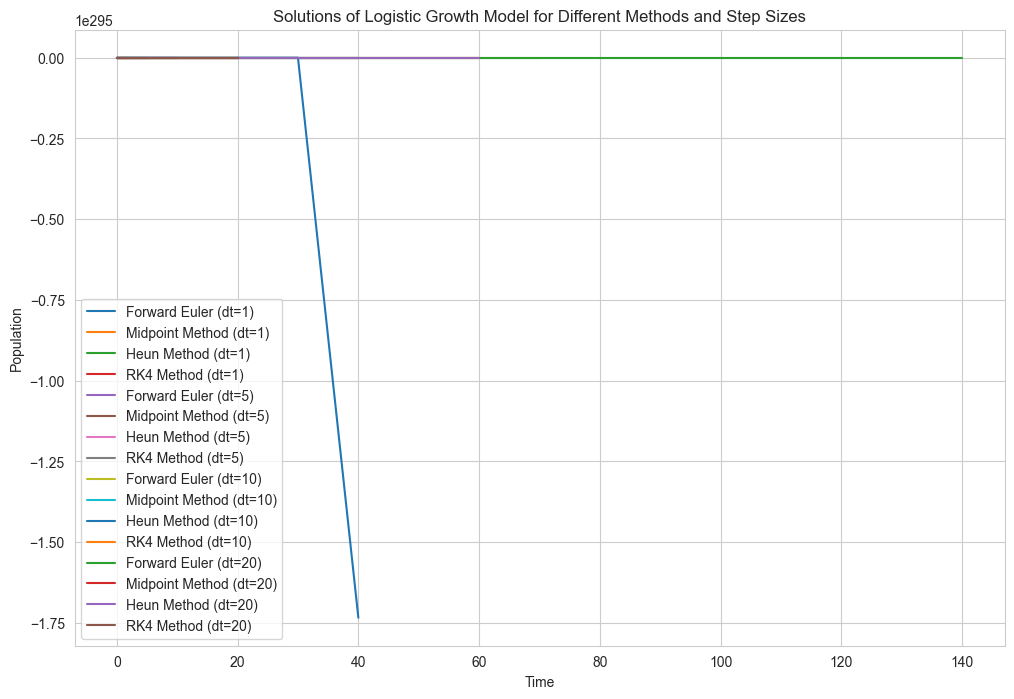

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
r = 5
K = 80
P0 = 90
t0 = 0
t_end = 200

# Function for the differential equation
def dP_dt(P):
    return r * P * (1 - P / K)

# Forward Euler Method
def forward_euler(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        P[i + 1] = P[i] + dt * dP_dt(P[i])
    return P

# Midpoint Method
def midpoint(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + 0.5 * dt * k1)
        P[i + 1] = P[i] + dt * k2
    return P

# Heun Method
def heun(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + dt * k1)
        P[i + 1] = P[i] + 0.5 * dt * (k1 + k2)
    return P

# Runge-Kutta Method (RK4)
def rk4(dt):
    num_steps = int((t_end - t0) / dt)
    P = np.zeros(num_steps + 1)
    P[0] = P0
    for i in range(num_steps):
        k1 = dP_dt(P[i])
        k2 = dP_dt(P[i] + 0.5 * dt * k1)
        k3 = dP_dt(P[i] + 0.5 * dt * k2)
        k4 = dP_dt(P[i] + dt * k3)
        P[i + 1] = P[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return P

# Step sizes to test
step_sizes = [1, 5, 10, 20]

# Plotting
plt.figure(figsize=(12, 8))

for dt in step_sizes:
    time_steps = np.arange(t0, t_end + dt, dt)
    
    # Forward Euler
    P_forward_euler = forward_euler(dt)
    plt.plot(time_steps, P_forward_euler, label=f'Forward Euler (dt={dt})')
    
    # Midpoint Method
    P_midpoint = midpoint(dt)
    plt.plot(time_steps, P_midpoint, label=f'Midpoint Method (dt={dt})')
    
    # Heun Method
    P_heun = heun(dt)
    plt.plot(time_steps, P_heun, label=f'Heun Method (dt={dt})')
    
    # RK4 Method
    P_rk4 = rk4(dt)
    plt.plot(time_steps, P_rk4, label=f'RK4 Method (dt={dt})')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Solutions of Logistic Growth Model for Different Methods and Step Sizes')
plt.legend()
plt.grid(True)
plt.show()


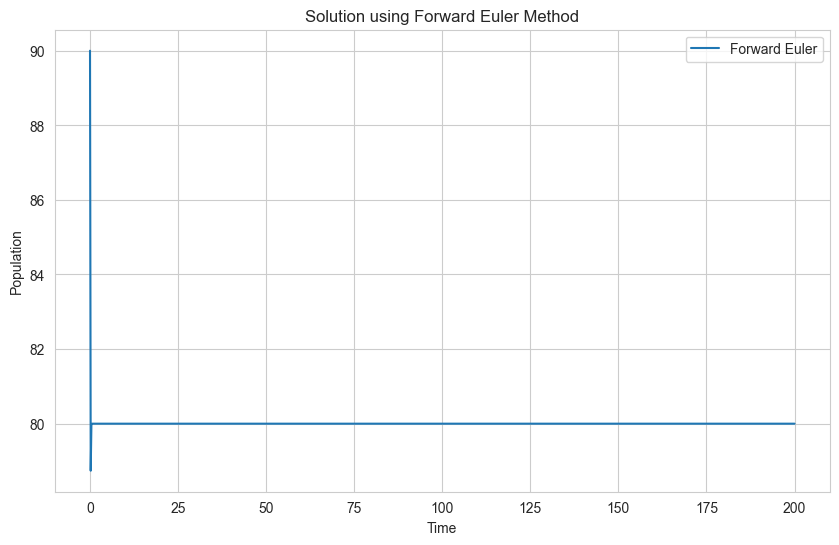

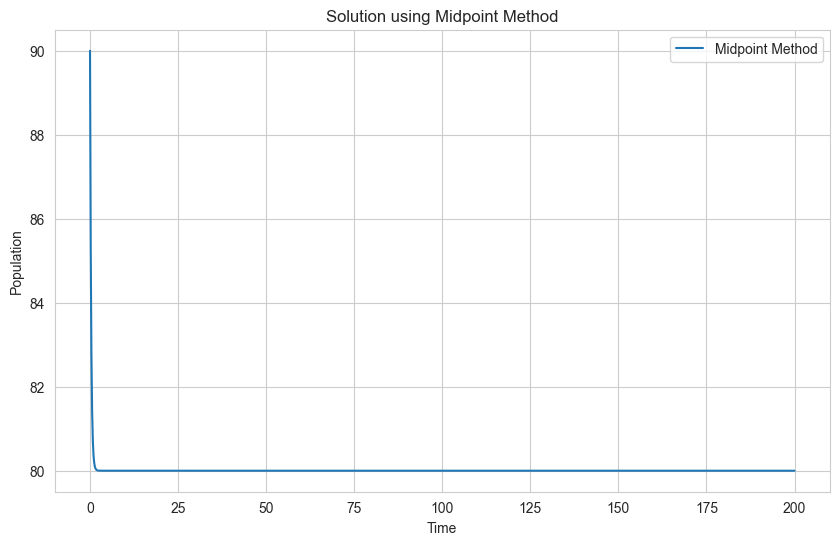

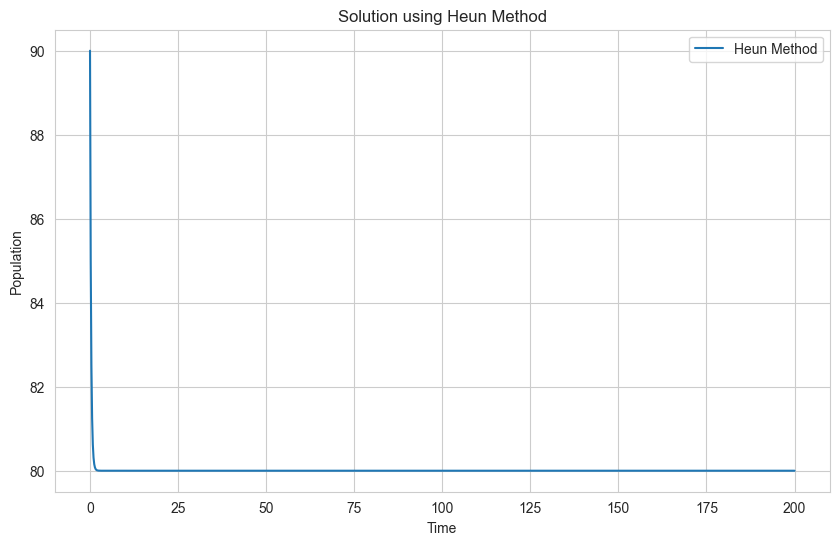

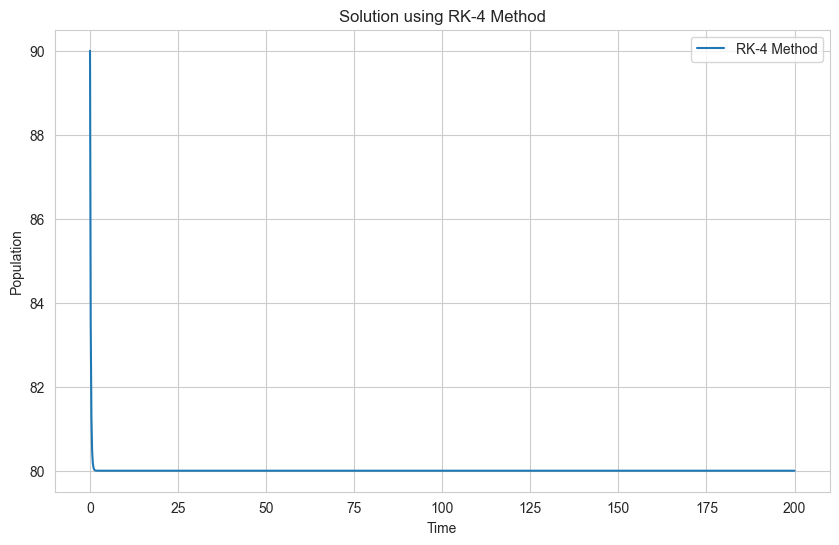

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(f, P0, t):
    """
    Forward Euler method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dP/dt = f(t, P)
        P0: initial value of P at t0
        t: array of time points where the solution is computed
        
    Returns:
        P: array containing the solution
    """
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        P[i] = P[i-1] + dt * f(t[i-1], P[i-1])
    # Plot the solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='Forward Euler')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Solution using Forward Euler Method')
    plt.legend()
    plt.grid(True)
    plt.show()
    return P

def midpoint_method(f, P0, t):
    """
    Midpoint method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dP/dt = f(t, P)
        P0: initial value of P at t0
        t: array of time points where the solution is computed
        
    Returns:
        P: array containing the solution
    """
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        P_half = P[i-1] + 0.5 * dt * f(t[i-1], P[i-1])
        P[i] = P[i-1] + dt * f(t[i-1] + 0.5 * dt, P_half)
    # Plot the solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='Midpoint Method')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Solution using Midpoint Method')
    plt.legend()
    plt.grid(True)
    plt.show()
    return P

def heun_method(f, P0, t):
    """
    Heun's method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dP/dt = f(t, P)
        P0: initial value of P at t0
        t: array of time points where the solution is computed
        
    Returns:
        P: array containing the solution
    """
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], P[i-1])
        k2 = f(t[i-1] + dt, P[i-1] + dt * k1)
        P[i] = P[i-1] + 0.5 * dt * (k1 + k2)
    # Plot the solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='Heun Method')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Solution using Heun Method')
    plt.legend()
    plt.grid(True)
    plt.show()
    return P

def rk4_method(f, P0, t):
    """
    Fourth-order Runge-Kutta method for solving an initial value problem.
    
    Parameters:
        f: function defining the ordinary differential equation dP/dt = f(t, P)
        P0: initial value of P at t0
        t: array of time points where the solution is computed
        
    Returns:
        P: array containing the solution
    """
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], P[i-1])
        k2 = f(t[i-1] + 0.5*dt, P[i-1] + 0.5*dt*k1)
        k3 = f(t[i-1] + 0.5*dt, P[i-1] + 0.5*dt*k2)
        k4 = f(t[i-1] + dt, P[i-1] + dt*k3)
        P[i] = P[i-1] + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    # Plot the solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='RK-4 Method')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Solution using RK-4 Method')
    plt.legend()
    plt.grid(True)
    plt.show()
    return P

# Define the logistic growth differential equation
def f(t, P):
    r = 5
    K = 80
    return r * P * (1 - P / K)

# Define initial conditions
P0 = 90
t = np.linspace(0, 200, 1000)  # Time points from 0 to 200

# Solve using different methods and plot the solutions
forward_euler_solution = forward_euler(f, P0, t)
midpoint_solution = midpoint_method(f, P0, t)
heun_solution = heun_method(f, P0, t)
rk4_solution = rk4_method(f, P0, t)
